# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [5]:
# Create a DataFrame for Cities Weather
cities_weather = {"City": cities}
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df["Cloudiness"] = ""
cities_weather_df["Country"] = ""
cities_weather_df["Date"] = ""
cities_weather_df["Humidity"] = ""
cities_weather_df["Lat"] = ""
cities_weather_df["Lng"] = ""
cities_weather_df["Max Temp"] = ""
cities_weather_df["Wind Speed"] = ""
cities_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,,,,,,,,
1,onega,,,,,,,,
2,hasaki,,,,,,,,
3,bluff,,,,,,,,
4,salta,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retrieval")
print("------------------------")

record_num = 1
num_of_set = 1

for index, row in cities_weather_df.iterrows():
    
    city = row["City"]
        
    target_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(target_url)
    data = response.json()
    
    try:
        cities_weather_df.loc[index, "Cloudiness"] = data["clouds"]["all"]
        cities_weather_df.loc[index, "Country"] = data["sys"]["country"]
        cities_weather_df.loc[index, "Date"] = data["dt"]
        cities_weather_df.loc[index, "Humidity"] = data["main"]["humidity"]
        cities_weather_df.loc[index, "Lat"] = data["coord"]["lat"]
        cities_weather_df.loc[index, "Lng"] = data["coord"]["lon"]
        cities_weather_df.loc[index, "Max Temp"] = data["main"]["temp_max"]
        cities_weather_df.loc[index, "Wind Speed"] = data["wind"]["speed"]
            
        print(f"Processing Record {record_num} of Set {num_of_set}| {city}")
        record_num += 1
        
    except:
        print("City not found. Skipping...")
        
    if record_num % 51 == 0 and record_num >= 51:
            num_of_set += 1
            record_num = 1
            time.sleep(60)

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1| mataura
Processing Record 2 of Set 1| onega
Processing Record 3 of Set 1| hasaki
Processing Record 4 of Set 1| bluff
Processing Record 5 of Set 1| salta
Processing Record 6 of Set 1| alhandra
Processing Record 7 of Set 1| ragonvalia
Processing Record 8 of Set 1| butaritari
Processing Record 9 of Set 1| mehamn
Processing Record 10 of Set 1| arraial do cabo
Processing Record 11 of Set 1| port elizabeth
Processing Record 12 of Set 1| gunjur
Processing Record 13 of Set 1| corn island
Processing Record 14 of Set 1| dravograd
Processing Record 15 of Set 1| borogontsy
Processing Record 16 of Set 1| ushuaia
Processing Record 17 of Set 1| kemijarvi
Processing Record 18 of Set 1| luwuk
Processing Record 19 of Set 1| haines junction
Processing Record 20 of Set 1| muros
City not found. Skipping...
Processing Record 21 of Set 1| sechura
Processing Record 22 of Set 1| rikitea
Processing Record 23 of Set 1| hobart
Process

Processing Record 43 of Set 4| vanimo
Processing Record 44 of Set 4| tiksi
Processing Record 45 of Set 4| zhigansk
Processing Record 46 of Set 4| chino valley
Processing Record 47 of Set 4| prince rupert
City not found. Skipping...
Processing Record 48 of Set 4| wewak
Processing Record 49 of Set 4| bundibugyo
Processing Record 50 of Set 4| assiniboia
Processing Record 1 of Set 5| komsomolskiy
Processing Record 2 of Set 5| pisco
Processing Record 3 of Set 5| hamilton
Processing Record 4 of Set 5| puerto escondido
Processing Record 5 of Set 5| victoria
Processing Record 6 of Set 5| aasiaat
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 5| matara
Processing Record 8 of Set 5| mountain home
Processing Record 9 of Set 5| kununurra
Processing Record 10 of Set 5| ranong
Processing Record 11 of Set 5| imbituba
Processing Record 12 of Set 5| aktash
Processing Record 13 of Set 5| beroroha
Processing Record 14 of Set 5| bengkulu
Processing Record 15 of Set 5| d

Processing Record 35 of Set 8| aripuana
Processing Record 36 of Set 8| ust-kuyga
Processing Record 37 of Set 8| coihaique
Processing Record 38 of Set 8| negombo
Processing Record 39 of Set 8| vodyane
Processing Record 40 of Set 8| belmonte
Processing Record 41 of Set 8| kloulklubed
Processing Record 42 of Set 8| coahuayana
Processing Record 43 of Set 8| roebourne
Processing Record 44 of Set 8| susaki
Processing Record 45 of Set 8| ambovombe
Processing Record 46 of Set 8| strathmore
Processing Record 47 of Set 8| hofn
Processing Record 48 of Set 8| deer lake
Processing Record 49 of Set 8| kruisfontein
Processing Record 50 of Set 8| teguise
Processing Record 1 of Set 9| trinidad
Processing Record 2 of Set 9| najran
Processing Record 3 of Set 9| the pas
Processing Record 4 of Set 9| maceio
Processing Record 5 of Set 9| mitu
Processing Record 6 of Set 9| waw
Processing Record 7 of Set 9| arman
Processing Record 8 of Set 9| maarianhamina
Processing Record 9 of Set 9| sumbawanga
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Check Cities Data Frame
cities_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1620708896,89,-46.1927,168.864,46,11.01
1,onega,100,RU,1620708897,89,63.9061,38.1404,49.15,8.63
2,hasaki,75,JP,1620708897,59,35.7333,140.833,66,6.91
3,bluff,100,NZ,1620708897,89,-46.6,168.333,46,11.01
4,salta,90,AR,1620708846,100,-24.7859,-65.4117,51.8,3.44
...,...,...,...,...,...,...,...,...,...
611,safakulevo,4,RU,1620709918,30,54.9901,62.5442,62.8,4.38
612,wattegama,40,LK,1620709919,74,6.7989,81.4808,87.8,4.61
613,buenaventura,87,CO,1620709919,79,3.8801,-77.0312,64,2.01
614,rumford,100,US,1620709919,70,44.5537,-70.5509,50,3.42


In [18]:
# Dropping rows with empty values
cities_df = cities_weather_df
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace=True)
cities_df.dropna(inplace=True)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100.0,NZ,1.620709e+09,89.0,-46.1927,168.8643,46.00,11.01
1,onega,100.0,RU,1.620709e+09,89.0,63.9061,38.1404,49.15,8.63
2,hasaki,75.0,JP,1.620709e+09,59.0,35.7333,140.8333,66.00,6.91
3,bluff,100.0,NZ,1.620709e+09,89.0,-46.6000,168.3333,46.00,11.01
4,salta,90.0,AR,1.620709e+09,100.0,-24.7859,-65.4117,51.80,3.44
...,...,...,...,...,...,...,...,...,...
610,peachtree city,90.0,US,1.620710e+09,100.0,33.3968,-84.5958,64.99,3.71
611,safakulevo,4.0,RU,1.620710e+09,30.0,54.9901,62.5442,62.80,4.38
612,wattegama,40.0,LK,1.620710e+09,74.0,6.7989,81.4808,87.80,4.61
613,buenaventura,87.0,CO,1.620710e+09,79.0,3.8801,-77.0312,64.00,2.01


In [19]:
cities_df.to_csv(r"cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
def humidity_over_100(s):
    over_100 = s.to_numpy()
    return (over_100[0] > 100).all()
humidity_over_100(cities_df["Humidity"])

False

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

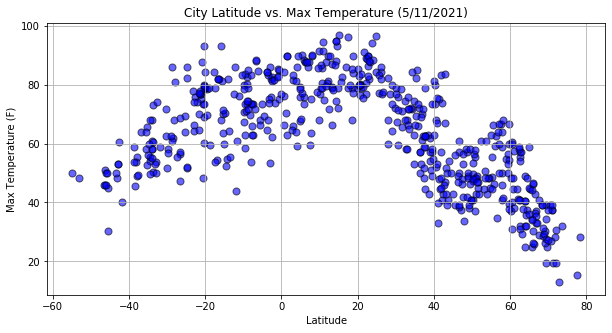

<Figure size 432x288 with 0 Axes>

In [27]:
latitude_values = cities_df["Lat"]
temp_values = cities_df["Max Temp"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, temp_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Max Temperature (5/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

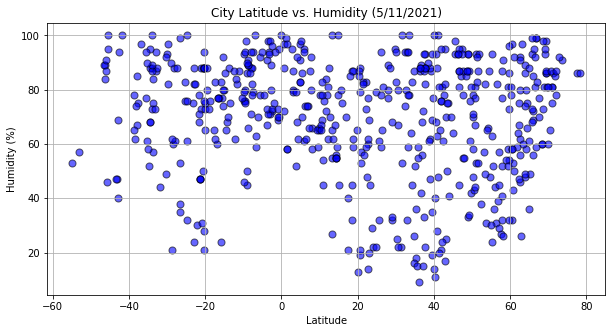

<Figure size 432x288 with 0 Axes>

In [28]:
humidity_values = cities_df["Humidity"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, humidity_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Humidity (5/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

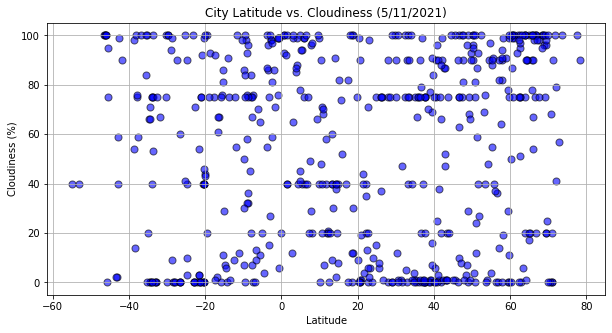

<Figure size 432x288 with 0 Axes>

In [29]:
cloud_values = cities_df["Cloudiness"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, cloud_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Cloudiness (5/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

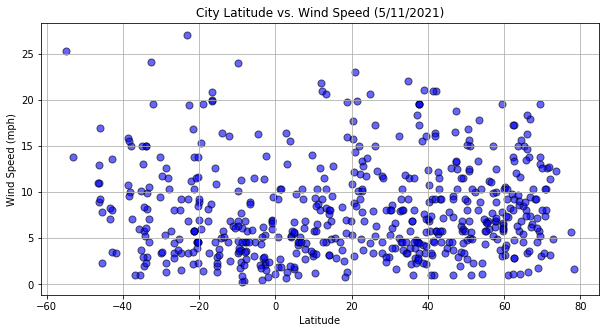

<Figure size 432x288 with 0 Axes>

In [30]:
wind_values = cities_df["Wind Speed"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, wind_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Wind Speed (5/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8351267179777475


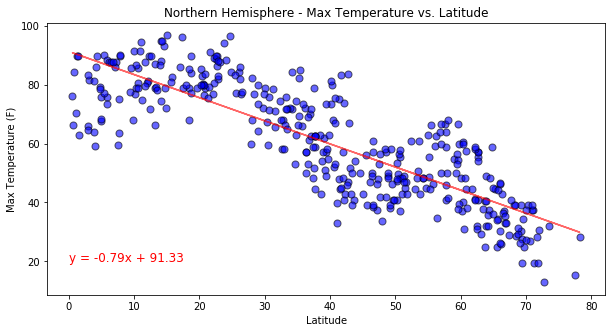

In [48]:
# Northern Hemisphere: Latitude > 0 Degrees
northern_hemisphere = cities_df["Lat"] > 0
northern_hemisphere_table = cities_df[northern_hemisphere]

x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6465538023865156


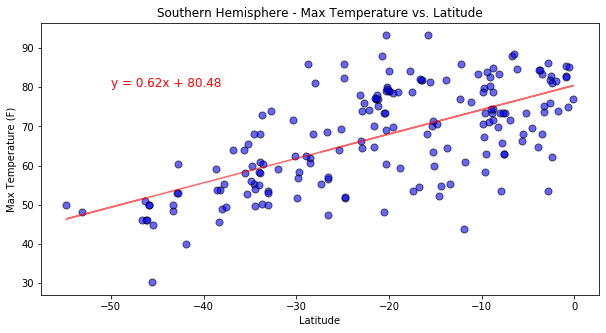

In [49]:
# Southern Hemisphere: Latitude < 0 Degrees
southern_hemisphere = cities_df["Lat"] < 0
southern_hemisphere_table = cities_df[southern_hemisphere]
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.024262200686642997


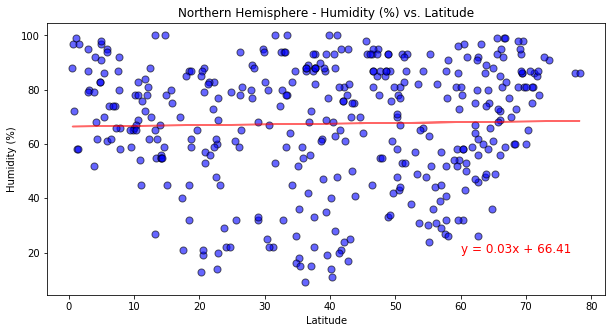

In [50]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13084552034400715


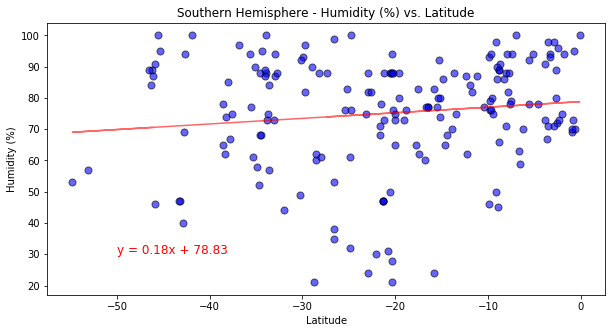

In [51]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1482824438771935


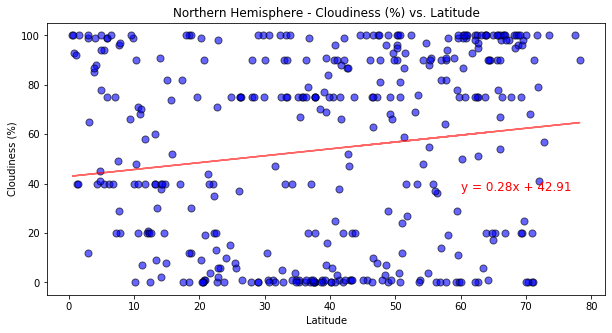

In [52]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,37),fontsize=12,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012985134147275765


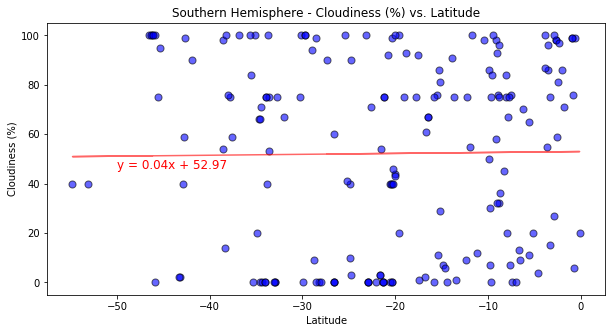

In [54]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,46),fontsize=12,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07439119173398917


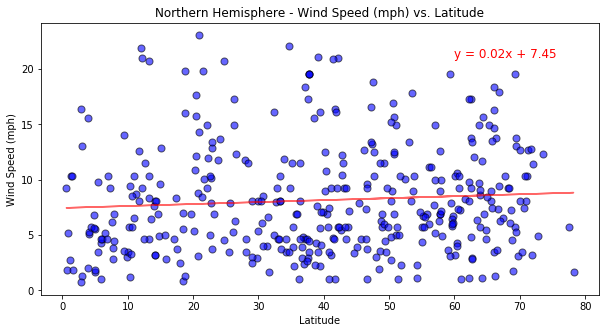

In [55]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,21),fontsize=12,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2892445235588477


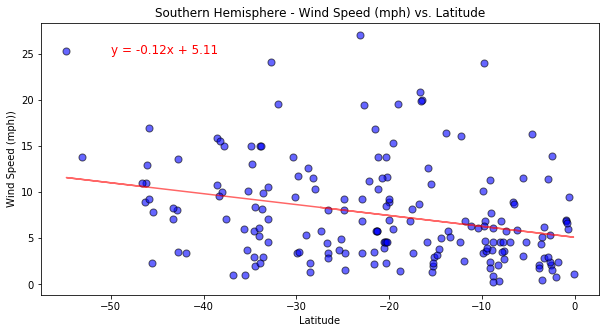

In [56]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.show()